In [1]:
import tensorflow as tf
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
except:
    IN_COLAB = False
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    if IN_COLAB: #If running in colab install tf 2.0
        !pip install tensorflow-gpu==2.0.0-alpha0
        !pip install tfp-nightly==0.7.0-dev20190511
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0-alpha0  running in colab?:  True


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline
plt.style.use('default')

print("TF  Version",tf.__version__)
np.random.seed(42)
tf.random.set_seed(42)

TF  Version 2.0.0-alpha0


In [3]:
model_vgg=tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', classes=1000)


553467904/553467096 [==============================] - 12s 0us/step


In [4]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from urllib.request import urlopen
from PIL import Image

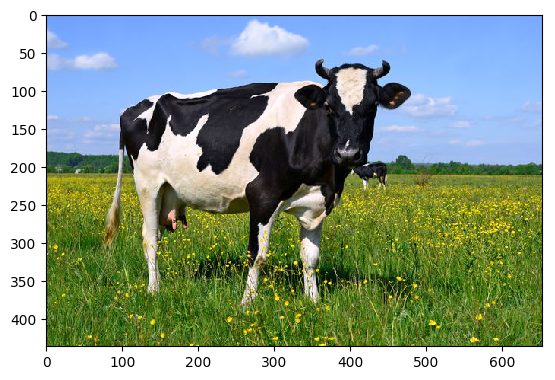

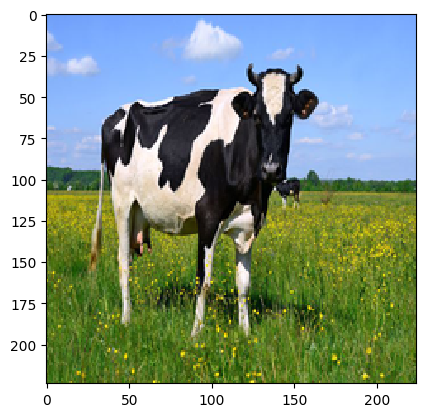

In [6]:
img = (Image.open(urlopen("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/cow.jpg")))
plt.imshow(img)
plt.show()
img = (Image.open(urlopen("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/cow.jpg")))
new_width  = 224
new_height = 224
img = img.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img)
plt.show()
img=np.array(img)

In [0]:
def preprocess_input(img):
  x=np.zeros((224,224,3),dtype="float32")
  x[:,:,0]=img[:,:,2]
  x[:,:,1]=img[:,:,1]
  x[:,:,2]=img[:,:,0]
  mean = [103.939, 116.779, 123.68]
  x[:,:, 0] = x[:,:, 0]-mean[0]
  x[:,:, 1] = x[:,:, 1]-mean[1]
  x[:,:, 2] = x[:,:, 2]-mean[2]
  return x 

In [0]:
def undo_preprocess_input(img):
  mean = [103.939, 116.779, 123.68]
  img[:,:, 0] = img[:,:, 0]+mean[0]
  img[:,:, 1] = img[:,:, 1]+mean[1]
  img[:,:, 2] = img[:,:, 2]+mean[2]
  x=np.zeros((224,224,3),dtype="float32")
  x[:,:,0]=img[:,:,2]
  x[:,:,1]=img[:,:,1]
  x[:,:,2]=img[:,:,0]
  return x 

In [9]:
img=preprocess_input(img)
img.shape

(224, 224, 3)

In [0]:
pred=model_vgg.predict(np.expand_dims(img,axis=0))

In [11]:
tf.keras.applications.vgg16.decode_predictions(pred)

40960/35363 [==================================] - 0s 0us/step


[[('n02403003', 'ox', 0.70679015),
  ('n01518878', 'ostrich', 0.049159404),
  ('n04604644', 'worm_fence', 0.04306775),
  ('n02109047', 'Great_Dane', 0.041346103),
  ('n02412080', 'ram', 0.02219216)]]

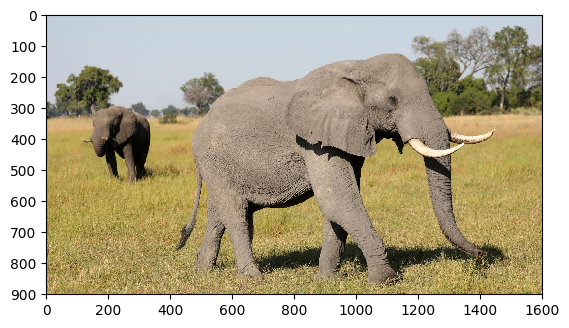

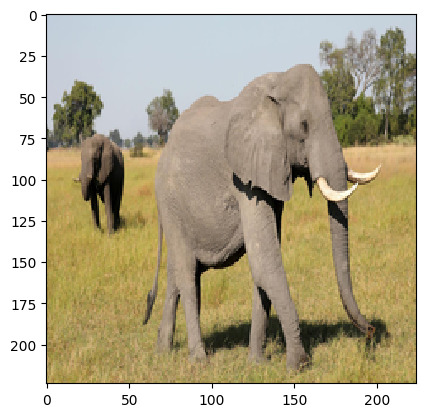

In [12]:
img = (Image.open(urlopen("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/elephant.jpg")))
plt.imshow(img)
plt.show()
img = (Image.open(urlopen("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/elephant.jpg")))
new_width  = 224
new_height = 224
img = img.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img)
plt.show()
img=np.array(img)
img=preprocess_input(img)

In [13]:
pred=model_vgg.predict(np.expand_dims(img,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred)

[[('n01871265', 'tusker', 0.5826044),
  ('n02504458', 'African_elephant', 0.394273),
  ('n02504013', 'Indian_elephant', 0.023043394),
  ('n02437312', 'Arabian_camel', 4.3915672e-05),
  ('n02092339', 'Weimaraner', 1.0098042e-05)]]

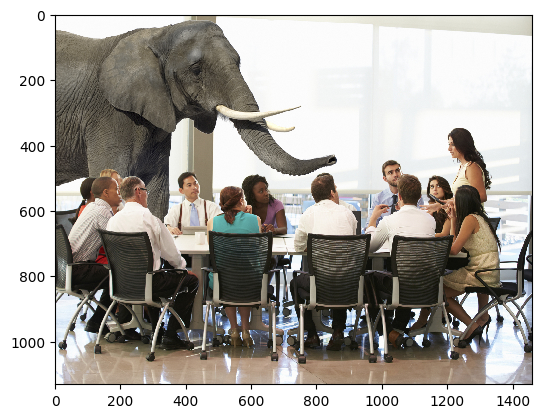

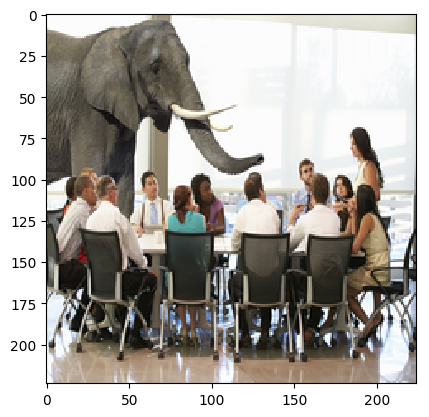

In [14]:
img = (Image.open(urlopen("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/elephant_in_room.jpg")))
plt.imshow(img)
plt.show()
img = (Image.open(urlopen("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/elephant_in_room.jpg")))
new_width  = 224
new_height = 224
img = img.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img)
plt.show()
img=np.array(img)
img=preprocess_input(img)

In [15]:
pred=model_vgg.predict(np.expand_dims(img,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred)

[[('n02504458', 'African_elephant', 0.30558515),
  ('n01871265', 'tusker', 0.21904513),
  ('n02504013', 'Indian_elephant', 0.20549127),
  ('n03141823', 'crutch', 0.0492375),
  ('n01704323', 'triceratops', 0.03111008)]]

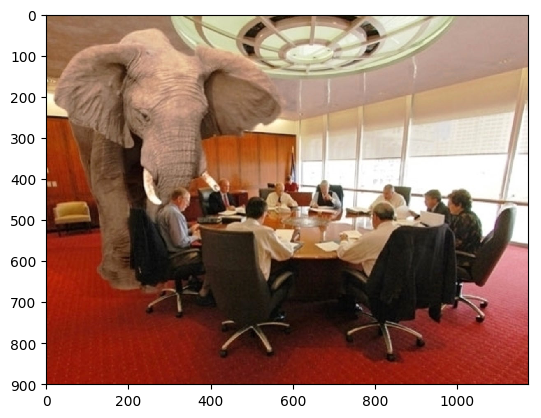

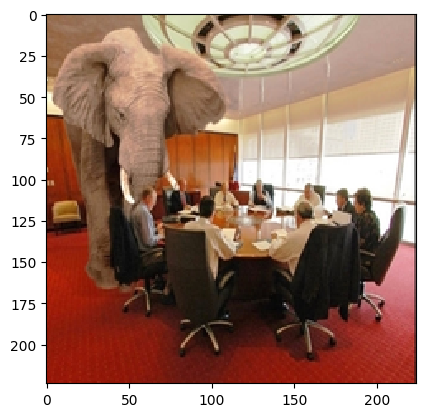

In [16]:
img = (Image.open(urlopen("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/elephant_in_room_2.jpg")))
plt.imshow(img)
plt.show()
img = (Image.open(urlopen("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/elephant_in_room_2.jpg")))
new_width  = 224
new_height = 224
img = img.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img)
plt.show()
img=np.array(img)
img=preprocess_input(img)

In [17]:
pred=model_vgg.predict(np.expand_dims(img,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred)
#no preprocessing

[[('n03661043', 'library', 0.08129304),
  ('n04200800', 'shoe_shop', 0.059315663),
  ('n04548280', 'wall_clock', 0.048242312),
  ('n04081281', 'restaurant', 0.02514253),
  ('n04462240', 'toyshop', 0.025119366)]]

In [0]:
pred=model_vgg.predict(np.expand_dims(img,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred)
#with preprocessing

[[('n03661043', 'library', 0.08129304),
  ('n04200800', 'shoe_shop', 0.059315663),
  ('n04548280', 'wall_clock', 0.048242312),
  ('n04081281', 'restaurant', 0.02514253),
  ('n04462240', 'toyshop', 0.025119366)]]

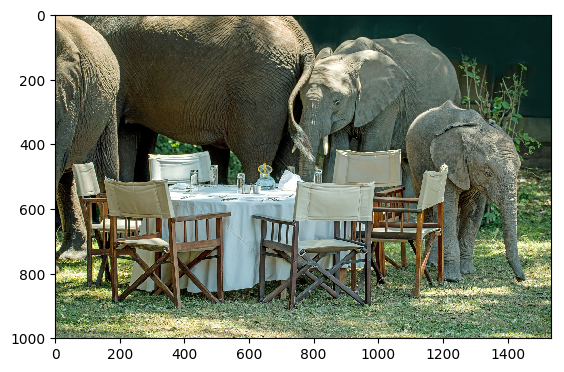

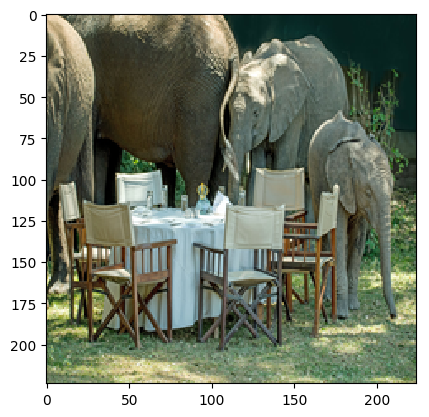

[[('n02504458', 'African_elephant', 0.78725404),
  ('n02504013', 'Indian_elephant', 0.15521035),
  ('n01871265', 'tusker', 0.05620043),
  ('n02437312', 'Arabian_camel', 0.0006839856),
  ('n01704323', 'triceratops', 0.00030830412)]]

In [18]:
img = (Image.open(urlopen("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/elephant_2.jpg")))
plt.imshow(img)
plt.show()
new_width  = 224
new_height = 224
img = img.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img)
plt.show()
img=np.array(img)
img=preprocess_input(img)
pred=model_vgg.predict(np.expand_dims(img,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred)

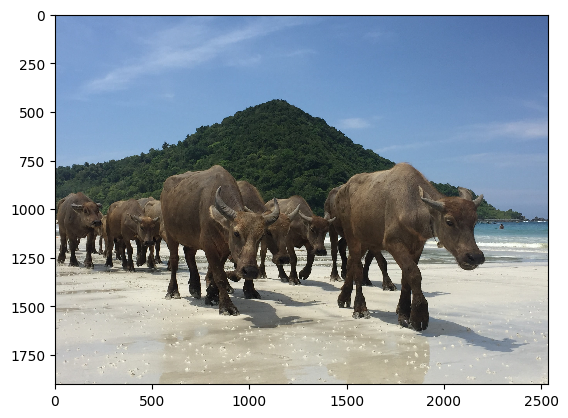

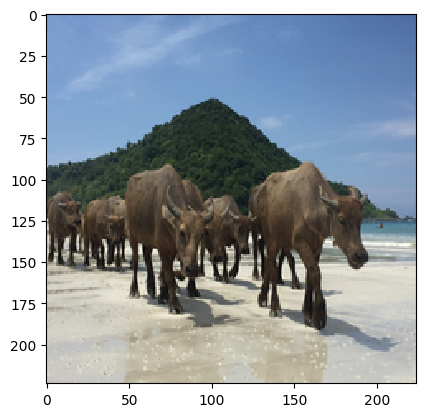

[[('n02504013', 'Indian_elephant', 0.30575743),
  ('n02504458', 'African_elephant', 0.28382444),
  ('n02437312', 'Arabian_camel', 0.15163687),
  ('n02408429', 'water_buffalo', 0.13768326),
  ('n01871265', 'tusker', 0.055736754)]]

In [19]:
img = (Image.open(urlopen("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/cow_2.jpg")))
plt.imshow(img)
plt.show()
new_width  = 224
new_height = 224
img = img.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img)
plt.show()
img=np.array(img)
img=preprocess_input(img)
pred=model_vgg.predict(np.expand_dims(img,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred)

## adversarial attack

In [0]:
img=np.expand_dims(img,axis=0)
img = tf.cast(img, tf.float32)


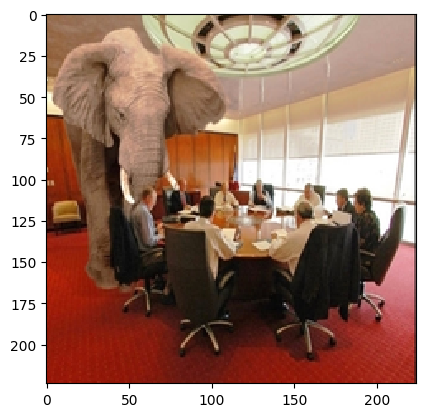

In [0]:
plt.imshow(np.array(undo_preprocess_input(img.numpy()[0]),dtype="uint8"))

In [0]:
pred=model_vgg.predict(img.numpy())
tf.keras.applications.vgg16.decode_predictions(pred)

[[('n03661043', 'library', 0.08129304),
  ('n04200800', 'shoe_shop', 0.059315663),
  ('n04548280', 'wall_clock', 0.048242312),
  ('n04081281', 'restaurant', 0.02514253),
  ('n04462240', 'toyshop', 0.025119366)]]

In [0]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def get_gradient_wrt_to_input(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model_vgg(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  #signed_grad = tf.sign(gradient)
  return gradient

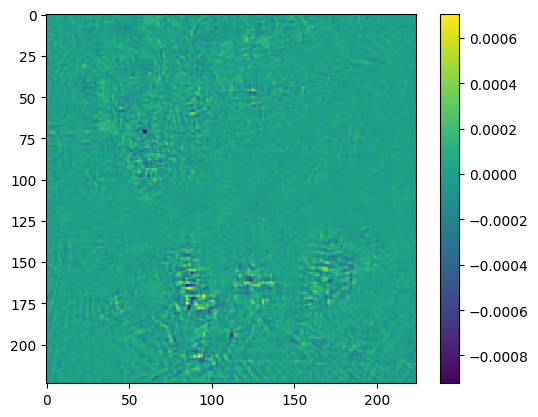

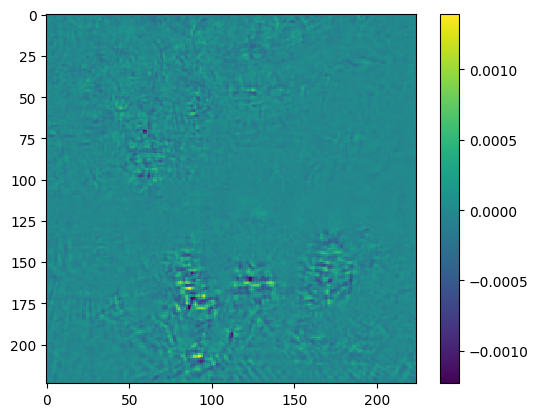

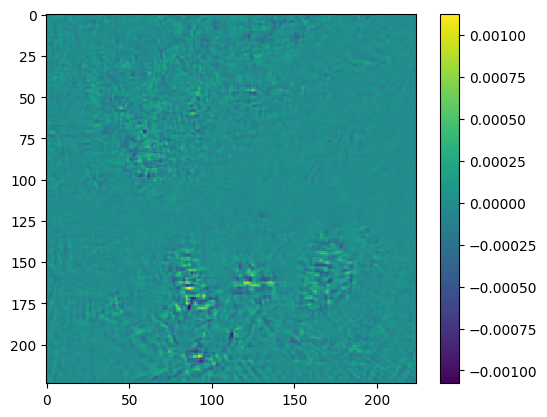

In [0]:
grads = get_gradient_wrt_to_input(img, tf.keras.utils.to_categorical(50,1000))
#plt.imshow(perturbations[0])
plt.imshow(grads[0,:,:,0])
plt.colorbar()
plt.show()
plt.imshow(grads[0,:,:,1])
plt.colorbar()
plt.show()
plt.imshow(grads[0,:,:,2])
plt.colorbar()
plt.show()

In [0]:
for i in range(0,10):
  img=img-5000*grads
  pred=model_vgg.predict(img)
  print(tf.keras.applications.vgg16.decode_predictions(pred))
  grads = get_gradient_wrt_to_input(img, tf.keras.utils.to_categorical(50,1000))
  #plt.imshow(image.numpy()[0,:,:,:])
  #plt.show()


[[('n01704323', 'triceratops', 0.08987711), ('n01817953', 'African_grey', 0.042651907), ('n04200800', 'shoe_shop', 0.029343903), ('n04462240', 'toyshop', 0.025609333), ('n04192698', 'shield', 0.025489185)]]
[[('n01698640', 'American_alligator', 0.791249), ('n01697457', 'African_crocodile', 0.081464514), ('n01667778', 'terrapin', 0.015677955), ('n02454379', 'armadillo', 0.014307855), ('n01689811', 'alligator_lizard', 0.013584375)]]
[[('n01698640', 'American_alligator', 0.89869684), ('n01697457', 'African_crocodile', 0.049193338), ('n02454379', 'armadillo', 0.008758589), ('n01689811', 'alligator_lizard', 0.005960264), ('n01667778', 'terrapin', 0.004960946)]]
[[('n01698640', 'American_alligator', 0.9241368), ('n01697457', 'African_crocodile', 0.03854505), ('n02454379', 'armadillo', 0.007015332), ('n01689811', 'alligator_lizard', 0.004364019), ('n01667778', 'terrapin', 0.003129439)]]
[[('n01698640', 'American_alligator', 0.93780386), ('n01697457', 'African_crocodile', 0.032936953), ('n0245

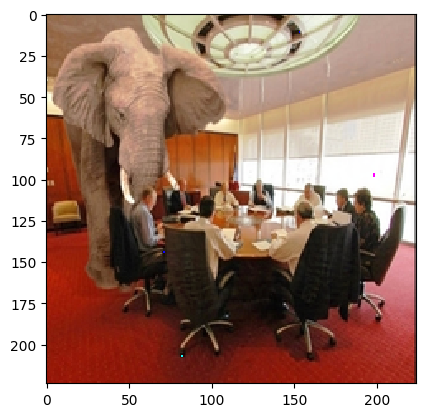

In [0]:
plt.imshow(np.array(undo_preprocess_input(img.numpy()[0]),dtype="uint8"))

In [0]:
pred=model_vgg.predict(img.numpy())
tf.keras.applications.vgg16.decode_predictions(pred)

[[('n01698640', 'American_alligator', 0.96478015),
  ('n01697457', 'African_crocodile', 0.020462159),
  ('n02454379', 'armadillo', 0.0033972876),
  ('n01689811', 'alligator_lizard', 0.0018623004),
  ('n01817953', 'African_grey', 0.0015167001)]]

In [0]:
print(np.argmax(pred))
print(np.max(pred))

50
0.96478015
